# Exercise Set 1
## Title
### Scientific Computing
Nitai Nijholt (12709018)

Pablo Rodriguez Alves (15310191)

In [1]:
from math import erfc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.animation as manimation
plt.rcParams['animation.ffmpeg_path'] = r'C:\FFmpeg\bin\ffmpeg.exe'

## 1. Vibrating string

### A. Discretize the wave equation
And write it in a form suitable for implementing in a computer program

In [2]:
def runge_kutta(func, y0, h, timesteps):
    """Runge Kutta 4th order implementation"""
    time_array = np.arange(0, timesteps*h, step=h)
    y = np.zeros(len(time_array))
    y[0] = y0
    for i in range(1, len(time_array)):
        k1 = func(y[i-1])
        k2 = func(y[i-1] + 0.5*h*k1)
        k3 = func(y[i-1] + 0.5*h*k2)
        k4 = func(y[i-1] + h*k3)
        y[i] = y[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return time_array, y

In [3]:
def create_2d_meshgrid(L = 1.0, T = 1.0, Nx = 100,  Nt = 100, boundry_conditon = 'fixed'):
    """Creating 2d meshgrid for numerically solving wave PDE'"""

    # Calculating the stepsize, exclusing 1 point
    delta_x = L / (Nx)
    delta_t = T / (Nt)

    # Creating space and time arrays
    x = np.linspace(0, L, Nx)

    print(x)
    t = np.linspace(0, T, Nt)

    # Combining space and time arrays into a 2d meshgrid
    X, T = np.meshgrid(x, t, indexing='ij')

    print(X)

    return X, T, delta_x, delta_t

In [4]:
def u_space(u, x_index, t_index, c, dx):
    """
    Compute the spatial update component for the wave equation.
    
    Parameters:
    - u: 2D array of u values
    - x_index: Index corresponding to the spatial position
    - t_index: Index corresponding to the time step
    - c: Wave speed
    - dx: Spatial step size
    
    Returns:
    - The spatial update component for u at the given index.
    """
    return (c**2) * (u[x_index + 1, t_index] - 2*u[x_index, t_index] + u[x_index - 1, t_index]) / (dx**2)

In [5]:
def run_wave_simulation(u, c, dx, dt, Nx, Nt):
    """
    Update the wave function u for all spatial points and for the next time step, using u_space for spatial updates.
    
    Parameters:
    - u: 2D array of u values, shape (Nx, Nt)
    - c: Wave speed
    - dx: Spatial step size
    - dt: Temporal step size
    - Nx: Number of spatial points
    - Nt: Number of time points
    """
    for t_index in range(0, Nt-1):  # Iterate through time steps
        for x_index in range(1, Nx-1):  # Iterate through spatial points, excluding boundaries
            # Calculate the spatial term using u_space
            spatial_term = u_space(u, x_index, t_index, c, dx)
            
            # Apply the update rule, incorporating the spatial term correctly
            if t_index == 0:
                u[x_index, t_index+1] = u[x_index, t_index]
            else:
                # General update rule for subsequent time steps
                u[x_index, t_index+1] = 2*u[x_index, t_index] - u[x_index, t_index-1] + spatial_term * dt**2
    return u

In [6]:
def delta_x_to_t_or_vice_versa(c, delta_x=None, delta_t=None): 
    """Takes as input c, the speed of the wave, and either delta_x or delta_t, and calculates the other from the Courant–Friedrichs–Lewy (CFL) condition for numerical stability."""
    if delta_x is not None and delta_t is None:
        # Calculate delta_t based on delta_x to satisfy the CFL condition
        delta_t = delta_x / np.sqrt(c)
        return delta_t
    elif delta_t is not None and delta_x is None:
        # Adjust delta_x based on delta_t to satisfy the CFL condition
        delta_x = delta_t * np.sqrt(c) 
        return delta_x
    else:
        raise ValueError("Either delta_x or delta_t must be provided, not both or neither.")


In [7]:
assert delta_x_to_t_or_vice_versa(delta_t= 0.001, c = 1) == 0.001

### B. Implement time stepping
And determine the time development of the string
And plot the results at several times in the same figure

In [8]:
# Setting parameters & Creating Mesh grid
delta_t = 0.001
delta_x = delta_x_to_t_or_vice_versa(delta_t= delta_t, c = 1)
L, T =  1.0, 1.0
Nx, Nt = int(L/delta_x), int(L/delta_t)
print('space steps:', Nx)
print('time steps:', Nt)
X, T_mesh, dx, dt = create_2d_meshgrid(L, T, Nx, Nt)
c = 1
# Initializing u based on X
u_1 = np.zeros((Nx, Nt))
u_2 = np.zeros((Nx, Nt))
u_3 = np.zeros((Nx, Nt))

space steps: 1000
time steps: 1000
[0.         0.001001   0.002002   0.003003   0.004004   0.00500501
 0.00600601 0.00700701 0.00800801 0.00900901 0.01001001 0.01101101
 0.01201201 0.01301301 0.01401401 0.01501502 0.01601602 0.01701702
 0.01801802 0.01901902 0.02002002 0.02102102 0.02202202 0.02302302
 0.02402402 0.02502503 0.02602603 0.02702703 0.02802803 0.02902903
 0.03003003 0.03103103 0.03203203 0.03303303 0.03403403 0.03503504
 0.03603604 0.03703704 0.03803804 0.03903904 0.04004004 0.04104104
 0.04204204 0.04304304 0.04404404 0.04504505 0.04604605 0.04704705
 0.04804805 0.04904905 0.05005005 0.05105105 0.05205205 0.05305305
 0.05405405 0.05505506 0.05605606 0.05705706 0.05805806 0.05905906
 0.06006006 0.06106106 0.06206206 0.06306306 0.06406406 0.06506507
 0.06606607 0.06706707 0.06806807 0.06906907 0.07007007 0.07107107
 0.07207207 0.07307307 0.07407407 0.07507508 0.07607608 0.07707708
 0.07807808 0.07907908 0.08008008 0.08108108 0.08208208 0.08308308
 0.08408408 0.08508509 0.08

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


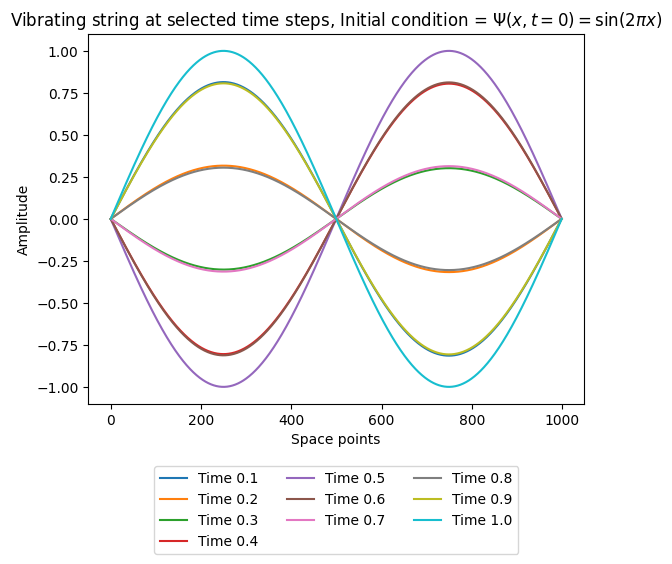

In [9]:
# Set time steps to observe
time_steps = np.array([0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
print(time_steps)
time_indices = time_steps * Nt

# Initial condition 1: 
u_1[:, 0] = np.sin(np.pi* 2 * X[:, 0])

# plt.plot(u[:, 0])


# Generating run data
run_data_cond_1 = run_wave_simulation(u_1, c, dx, dt, Nx, Nt)

# Plotting over multiple different timesteps
subset_data = np.zeros((1000,10))
for i, time_index in enumerate(time_indices):
    subset_data = run_data_cond_1[:, int(time_index)-1]
    plt.plot(subset_data, label=f'Time {time_steps[i]:.1f}')


plt.title(r'Vibrating string at selected time steps, Initial condition = $\Psi(x,t=0)=\sin(2\pi x)$')
plt.xlabel('Space points')
plt.ylabel('Amplitude')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

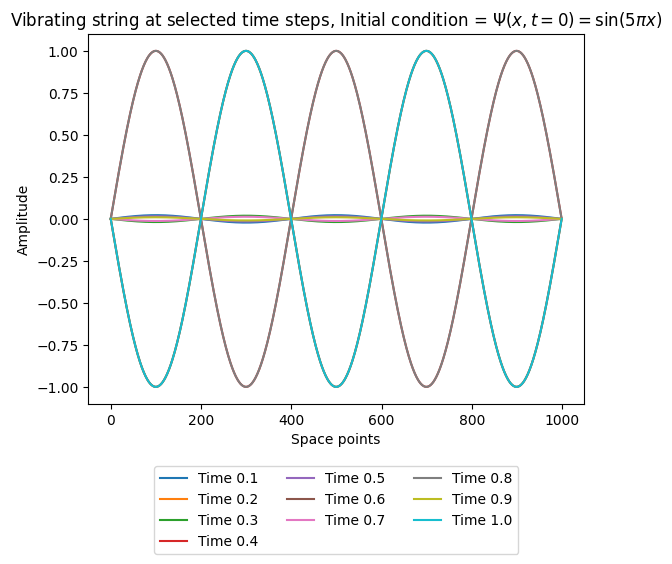

In [10]:
# Set time steps to observe
time_steps = np.array([0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
time_indices = time_steps * Nt

# print(u.shape)
u_2[:, 0] = np.sin(np.pi* 5 * np.linspace(0, 1, 1000))

# Generating run data
run_data_cond_2 = run_wave_simulation(u_2, c, dx, dt, Nx, Nt)

# Plotting over multiple different timesteps
subset_data = np.zeros((1000,10))
for i, time_index in enumerate(time_indices):
    subset_data = run_data_cond_2[:, int(time_index)-1]
    plt.plot(subset_data, label=f'Time {time_steps[i]:.1f}')
plt.title(r"Vibrating string at selected time steps, Initial condition = $\Psi(x,t=0)=\sin(5\pi x)$")
plt.xlabel('Space points')
plt.ylabel('Amplitude')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()


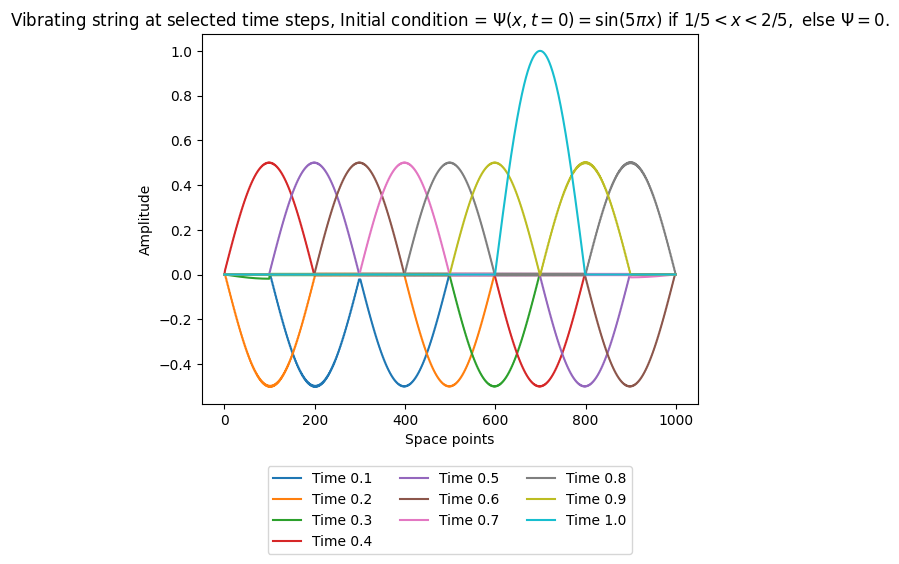

In [12]:
# Set time steps to observe
time_steps = np.array([0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
time_indices = time_steps * Nt

# Initial condition 3: Special case
cond_3_init_positions = u_3.copy()
condition = (X[:, 0] > 1/5) & (X[:, 0] < 2/5)
cond_3_init_positions[condition, 0] = np.sin(np.pi * 5 * X[condition, 0])
cond_3_init_positions[~condition, 0] = 0

# Applying the inital condition
u_3[:, 0] = cond_3_init_positions[:, 0]
# Generating run data
run_data_cond_3 = run_wave_simulation(u_3, c, dx, dt, Nx, Nt)


# Plotting over multiple different timesteps
subset_data = np.zeros((1000,10))
for i, time_index in enumerate(time_indices):
    subset_data = run_data_cond_3[:, int(time_index)-1]
    plt.plot(subset_data, label=f'Time {time_steps[i]:.1f}')
plt.title(r"Vibrating string at selected time steps, Initial condition = $\Psi(x,t=0)=\sin(5\pi x)\mathrm{~if~}1/5<x<2/5,\mathrm{~else~}\Psi=0.$")
plt.xlabel('Space points')
plt.ylabel('Amplitude')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()


### C. Make an animated plot of the time development

In [ ]:
run_data_all_conditions= [run_data_cond_1, run_data_cond_2, run_data_cond_3]

In [ ]:
def make_animation(run_data):
    """
    A simple example of an animated plot, code obtained from: https://matplotlib.org/2.0.2/examples/animation/simple_anim.html (given in assignment description)
    and agumented a little by adding the HTML 5 video
    """
    fig, ax = plt.subplots()
    line, = ax.plot(range(run_data.shape[0]), run_data[:, 0])  # Initialize the line with the first frame of data

    def animate(i):
        line.set_ydata(run_data[:, i])  # Update the data for the next frame
        return line,

    def init():
        line.set_ydata(np.ma.array(range(run_data.shape[0]), mask=True))  # Mask the array for the initial state
        return line,

    ani = animation.FuncAnimation(fig, func=animate, frames=range(run_data.shape[1]), init_func=init,
                                interval=100, blit=False)  # Set blit=False because it does not work
    plt.close(fig)
    plt.show()
    return HTML(ani.to_html5_video())

In [ ]:
make_animation(run_data_cond_1)

In [ ]:
make_animation(run_data_cond_2)

In [ ]:
make_animation(run_data_cond_3)

## 2. The Time Dependent Diffusion Equation

### D. Determine the equation to use at the boundaries of the domain.
Clearly show the ranges of the indices of the grid. A figure is extremely helpful for figuring this out.

In [ ]:
def is_solution_stable(D,dt,dx):
    print((4*dt*D)/(dx**2))
    return (4*dt*D)/(dx**2) <= 1

def is_point_in_bounds(c,i,j):
    imax,jmax = c.shape
    return bool(i >= 0 and i < imax and j >= 0 and j < jmax)

def get_neighboors(c,i,j,N):
    # Get neighboors if possible
    # Later on additional conditions will be added here for sinks and so on...

    # TODO: Connect values in columns!!!

    if j==0:
        # Left column
        # value for j-1 is now the last column (j==N-1)!
        c1 = c[i+1,j] if is_point_in_bounds(c,i+1,j) else 0
        c2 = c[i-1,j] if is_point_in_bounds(c,i-1,j) else 0
        c3 = c[i,j+1] if is_point_in_bounds(c,i,j+1) else 0
        c4 = c[i,N-1]
    elif j==(N-1):
        # Right column
        # Value for j+1 is now the first column (j=0)
        c1 = c[i+1,j] if is_point_in_bounds(c,i+1,j) else 0
        c2 = c[i-1,j] if is_point_in_bounds(c,i-1,j) else 0
        c3 = c[i,0]
        c4 = c[i,j-1] if is_point_in_bounds(c,i,j-1) else 0
    else:
        c1 = c[i+1,j] if is_point_in_bounds(c,i+1,j) else 0
        c2 = c[i-1,j] if is_point_in_bounds(c,i-1,j) else 0
        c3 = c[i,j+1] if is_point_in_bounds(c,i,j+1) else 0
        c4 = c[i,j-1] if is_point_in_bounds(c,i,j-1) else 0

    return c1,c2,c3,c4

def start_grid(N):
    c = np.zeros((N,N))
    
    # Left column
    c[:,0] = 0

    # Right column same as left
    #c[:,N-1] = c[:,0]

    # Top row
    c[0,:] = 1

    # Bottom row
    #c[N-1,:] = 0
    return c

def update(c,dx,dt,D,N):
    # Make a copy to avoid overwriting data early!
    c_k = c.copy()
    
    # Go over every point
    for i,j in np.ndindex(c.shape):
        # Boundary cases: top row, right column and bottom row
        if i==0:
            # Top row
            c_k[i,j] = 1 
        elif i==(N-1):
            # Bottom row          
            c_k[i,j] = 0
        else:
            # Other cases
            # Connected columns dealt within get_neighboors
            c1,c2,c3,c4 = get_neighboors(c_k,i,j,N)
            c[i,j] = c_k[i,j] + (dt*D)*(c1+c2+c3+c4-4*c_k[i,j])/(dx**2)
    return c


def plot_opinion_grid_evolution(c_sim, interval=250, name='sim.gif'):
    """
    # Ask the teacher on Wednesday
    """
    plt.figure(figsize=(6, 6), layout='tight')

    def update(t):
        plt.clf()
        plt.imshow(c_sim[t], vmin=0, vmax=1)
        plt.axis(False)
        plt.grid(True)
        #plt.title('Timestep:',t)
        #plt.clim(0,1)
        plt.colorbar()
        return plt

    anim = animation.FuncAnimation(plt.gcf(), update, frames=range(
            0, c_sim.shape[0]), interval=interval)


    writergif = animation.PillowWriter(fps=30)
    anim.save(name, dpi=300, writer=writergif)





In [ ]:
# Define global parameters
XMAX,YMAX = 1,1
N = 50
D = 1
TIME = 1
dt = 0.00005 #0.0005 #  0.001 # 
dx = 1/N

# Ensure our parameters create a stable solution
assert is_solution_stable(D,dt,dx), f'Solution is not stable, check your parameters!'

# Create grid
c = start_grid(N)

# Time vector
t_vector = np.linspace(0,TIME,int(TIME/dt))

# Create matrices for the simulation
c_sim = np.zeros((t_vector.size,N,N))

0.5


In [ ]:
# Run the simulation
for t in range(int(TIME/dt)):
    c = update(c,dx,dt,D,N)
    c_sim[t,:,:] = c

In [ ]:
# Save data to file
# WARNING: MAY TAKE LOTS OF SPACE
np.save('c_sim.npy',c_sim)

In [ ]:
# Load file
c_sim = np.load('c_sim.npy')

### E. Test the correctness of your simulation.
Compare to the analytic solutions, plot c(y) for different times.

In [ ]:
def c_analytical(y,t,D,sum_points):
    # Update all terms at once with formula, using sum_points terms for the sum and return the sum
    terms = [erfc((1-y+2*i)/(2*np.sqrt(D*t)))-erfc((1+y+2*i)/(2*np.sqrt(D*t))) for i in range(sum_points)]
    return np.sum(terms)

In [ ]:
# Select time points of interest
times = [0.001,0.01,0.1,1]

In [ ]:
# Compute analytical solution
cs_anals = np.zeros((len(times),N))

# Y axis for the analytical solution
ys = np.linspace(0,1,N)

# Terms to use in the infinite sum of the analytical solution
sum_points = 50 

for i in range(len(times)):
    time = times[i]
    cs_anals[i,:] = [c_analytical(y,time,D,sum_points) for y in ys]

In [ ]:
# Define a function to get the index of the desired times of the simulation
def get_index(time,dt):
    return int(time/dt)-1

# Save them to the array
cs_sims = np.zeros((len(times),N,N))

# Retrieve the values at the right times
cs_sims[0,:,:] = c_sim[get_index(0.001,dt),:,:]
cs_sims[1,:,:] = c_sim[get_index(0.01,dt),:,:]
cs_sims[2,:,:] = c_sim[get_index(0.1,dt),:,:]
cs_sims[3,:,:] = c_sim[get_index(1,dt),:,:]

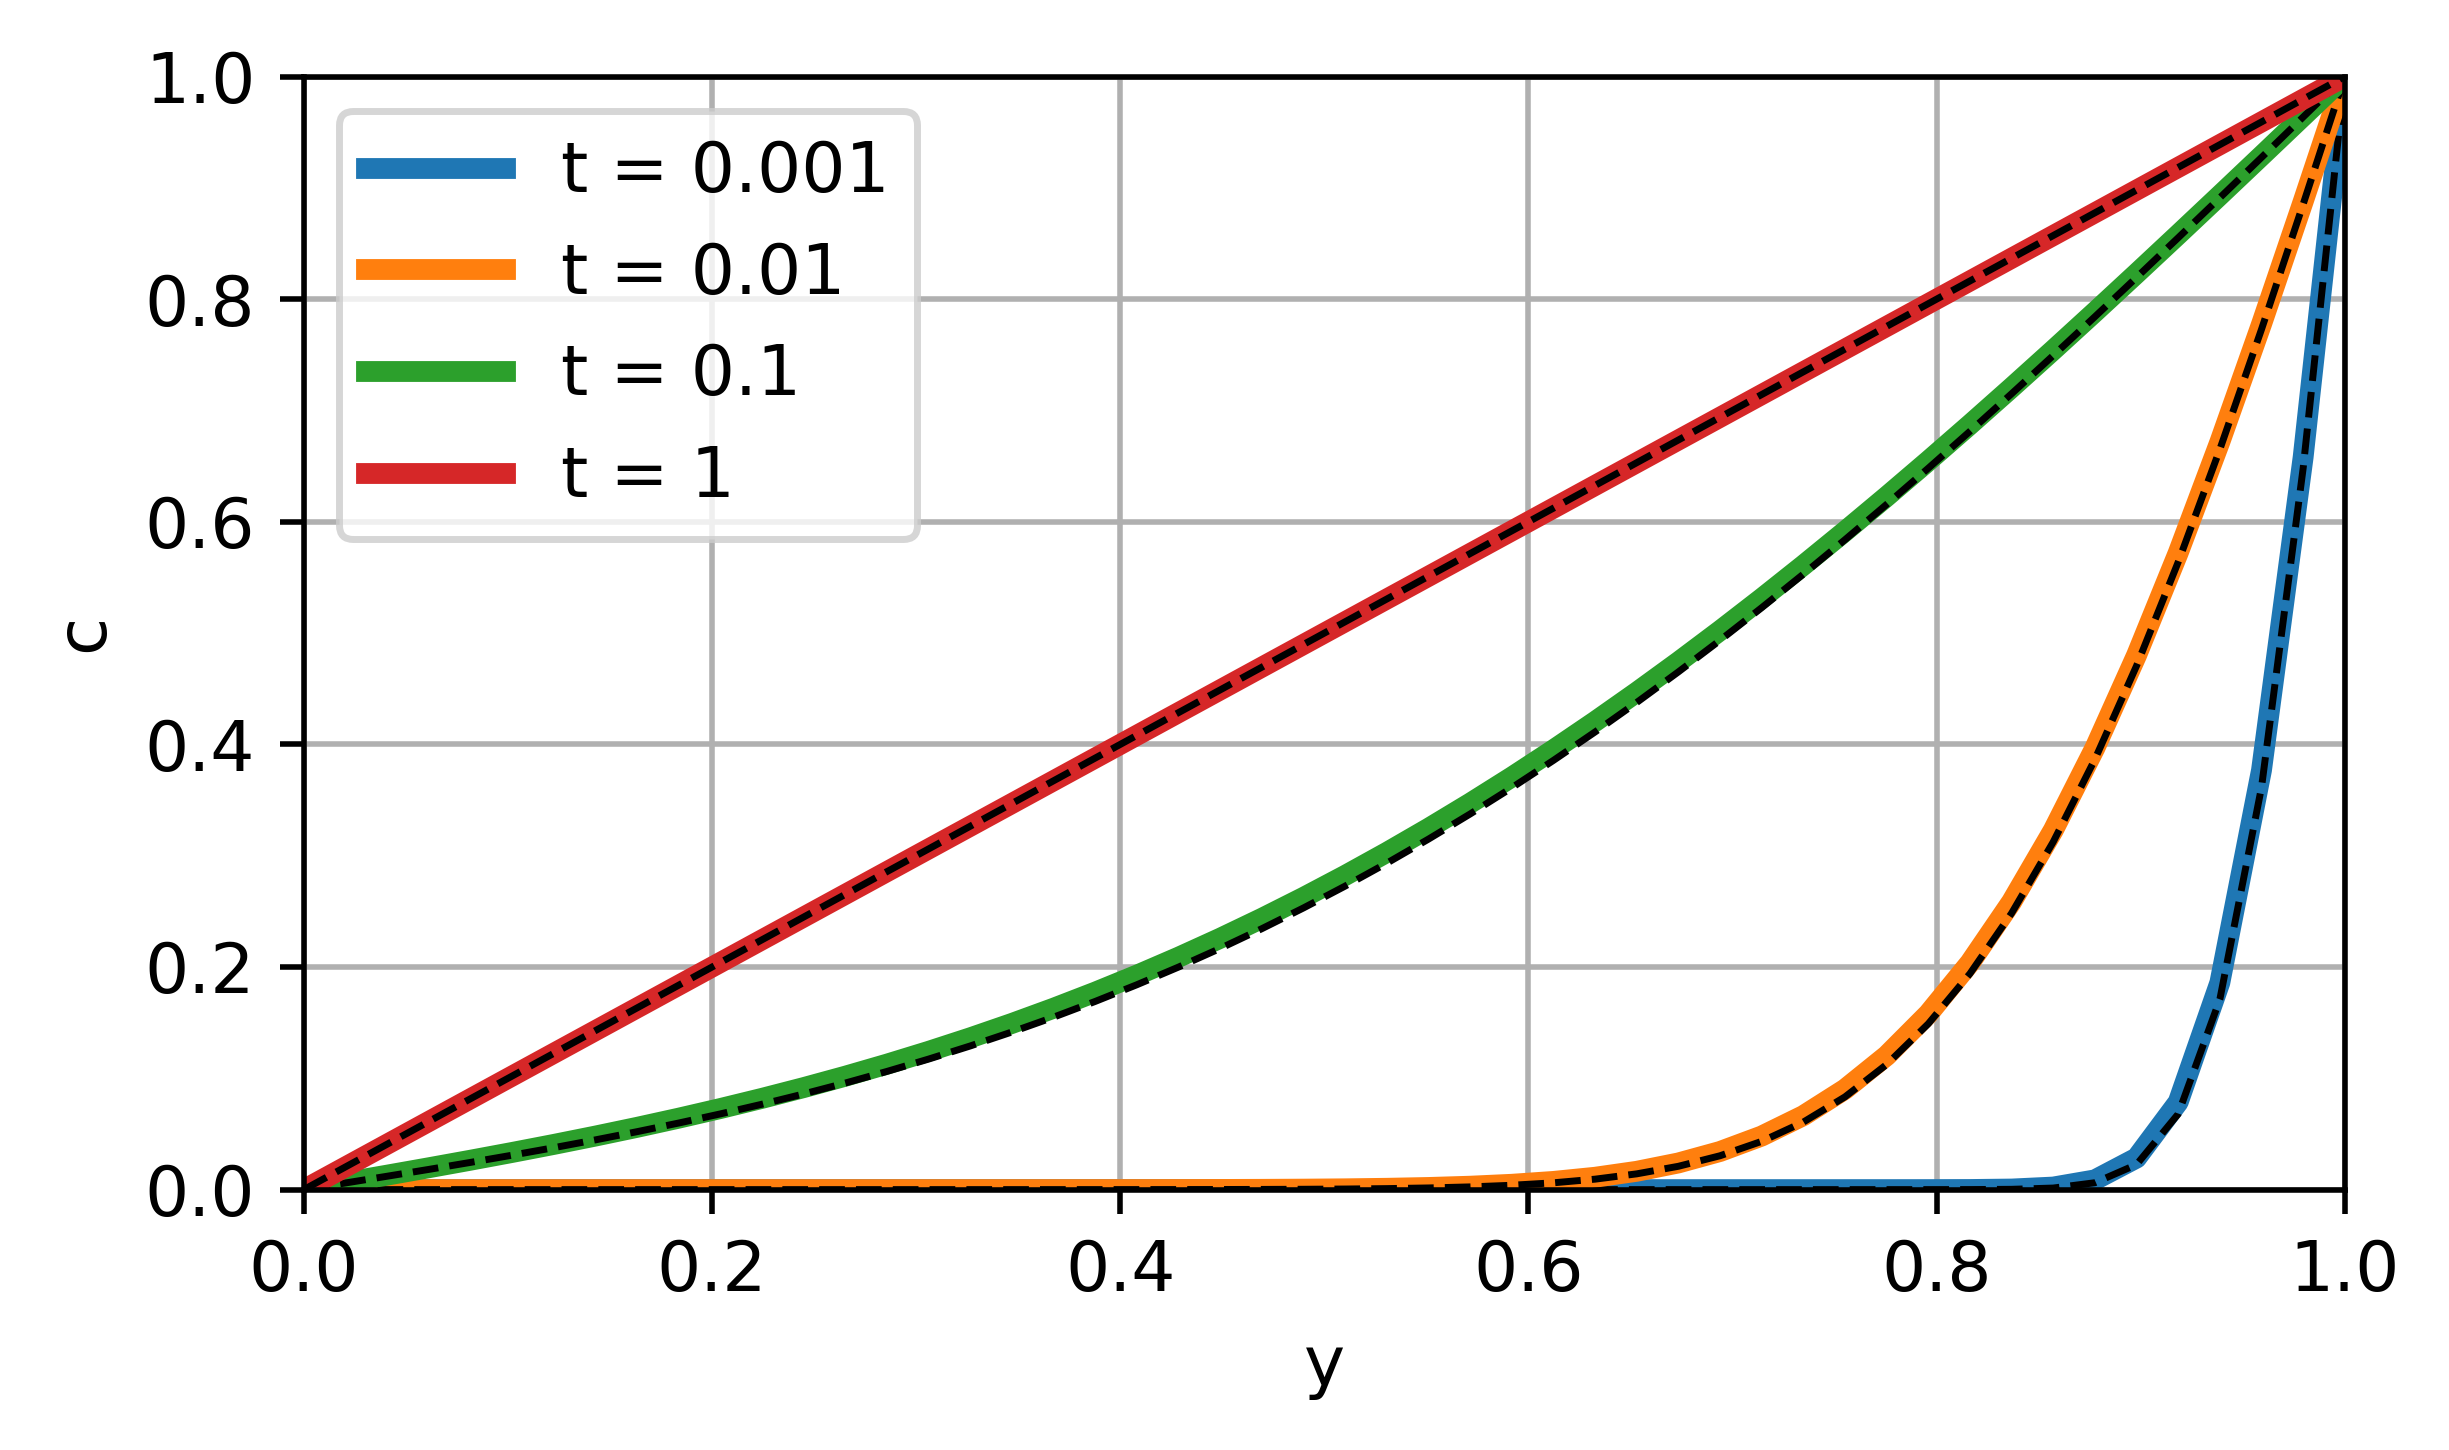

In [ ]:
# Repliate Figure 2 of the assignment
plt.figure(figsize=(5,3),dpi=500)

# For all times of interest
for i in range(len(times)):
    # Simulation
    plt.plot(ys,cs_sims[i,::-1,int(N/2)],linestyle='-',label='t = '+str(times[i]),lw=3)
    
    # Analytical solution
    plt.plot(ys,cs_anals[i,:],linestyle='--',color='black',lw=1)

# Aesthetics
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('y')
plt.ylabel('c')

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

### F. Plot the results
Show the 2D domain, with a color representing the concentration at each points

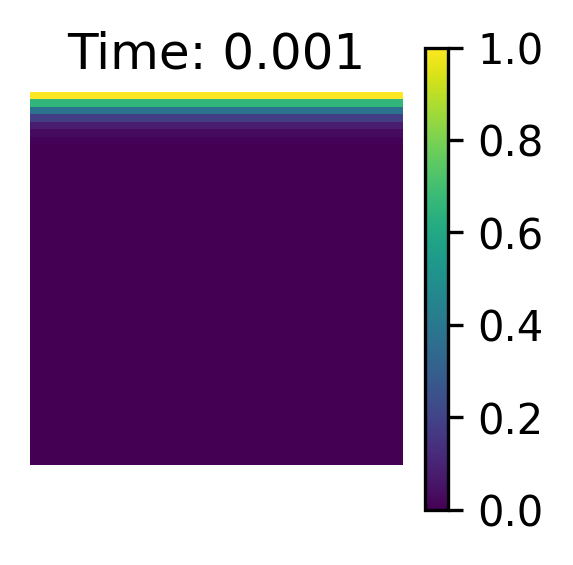

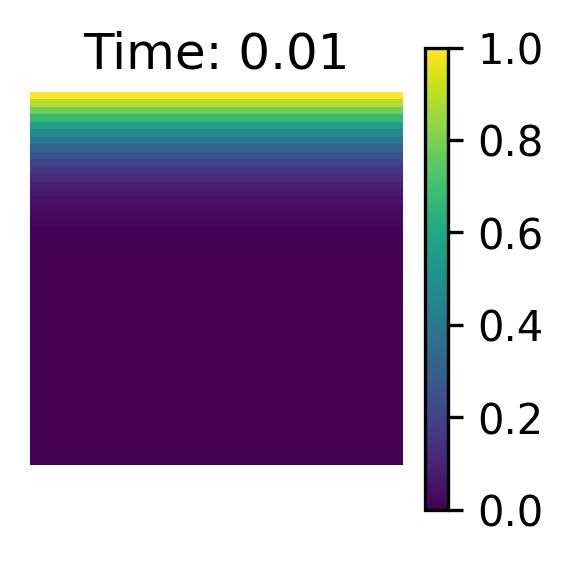

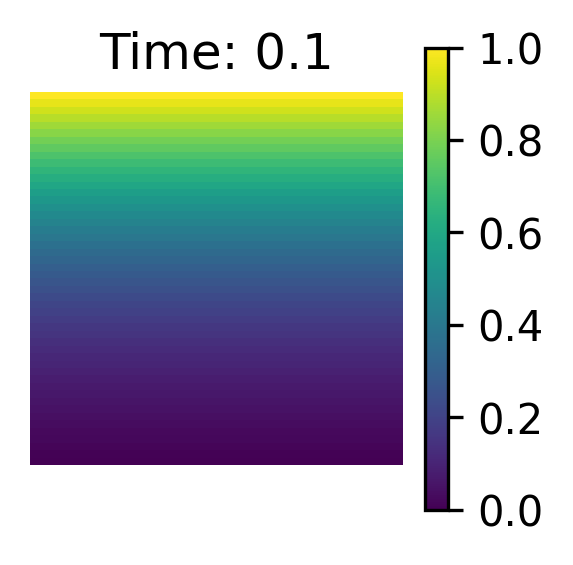

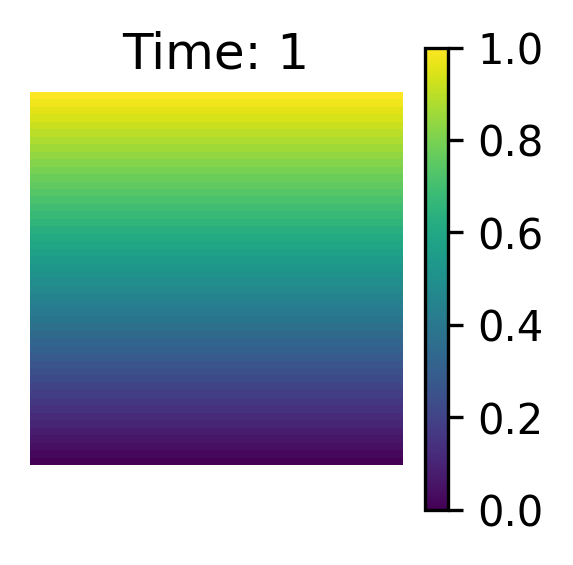

In [ ]:
# Get system at desired times
for i in range(len(times)):
    time = times[i]
    sim = cs_sims[i,:,:]
    plt.figure(figsize=(2,2),dpi=300)

    plt.clf()
    plt.imshow(sim, vmin=0, vmax=1)
    plt.axis(False)
    plt.grid(True)
    plt.title('Time: '+str(time))
    plt.colorbar()
    

### G. Make an animated plot until equilibrium

In [ ]:
def plot_opinion_grid_evolution_fix(c_sim, interval=250):
    """
    # Ask the teacher on Wednesday
    """
    plt.figure(figsize=(3, 3), layout='tight')

    def update(t):
        plt.clf()
        plt.imshow(c_sim[t,:,:], vmin=0, vmax=1)
        plt.axis(False)
        plt.grid(True)
        plt.colorbar()
        return plt

    anim = animation.FuncAnimation(plt.gcf(), update, frames=range(
            0, c_sim.shape[0]), interval=interval)

    #writergif = animation.PillowWriter(fps=10)
    #anim.save(name, dpi=300, writer=writergif)
    writer = animation.FFMpegWriter(fps=10)
    anim.save('demo.mp4', writer = writer)

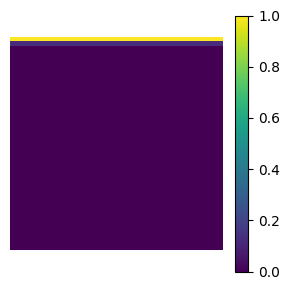

In [ ]:
# Monday 19/2 - try to export to mp4 instead
# This line should be enough!
plot_opinion_grid_evolution_fix(c_sim, interval=25)

In [ ]:
#c_sim[::2,:,:].shape

# Take one out of every 2 timeseteps for the animation
c_sim_reduced = c_sim[::50,:,:]


In [ ]:
# As many samples as timesteps in the simulation
frames = c_sim_reduced.shape[0]

print(frames)

400


In [ ]:
fig, ax = plt.subplots()

def update(frame):
    # Update data stored
    data = c_sim_reduced[frame,:,:]
    plt.imshow(data, vmin=0, vmax=1)
    #plt.colorbar()
    # Update plot
    return plt


ani = animation.FuncAnimation(fig=fig,func=update,frames=frames,interval=30)

writergif = animation.PillowWriter(fps=120)

#ani.save('test.mp4', dpi=300, writer='ffmpeg')

ani.save('test.gif', dpi=300, writer=writergif)

In [ ]:
fig, ax = plt.subplots()

def update(frame):
    # Update data stored
    data = c_sim_reduced[frame,:,:]
    plt.imshow(data, vmin=0, vmax=1)
    #plt.colorbar()
    # Update plot
    return plt


ani = animation.FuncAnimation(fig=fig,func=update,frames=frames,interval=30)

#writergif = animation.PillowWriter(fps=120)

ani.save('test.mp4', dpi=300, writer='ffmpeg')

In [ ]:
c_sim.shape

(20000, 50, 50)

In [ ]:
# Animation (saved as sim.gif, takes some time)
# Warning this code breaks the system!
# Changed the call from c_sim to c_sim[::,:,:]

plot_opinion_grid_evolution_fix(c_sim[::,:,:], interval=10, name='G_animation.gif')

## 1.3 Time Independent ...

### H. Implement the Jacobi iteration, the Gauss-Seidel method and SOR.
Try N= 50. Test the methods by comparing the result to the analytical result in eq.5

In [ ]:
# Functions go here
def update_jacobi(c,N):
    c_k = c.copy()

    for i,j in np.ndindex(c.shape):
        # Same as before
        if i==0:
            c[i,j] = 1
        elif i==(N-1):             
            c[i,j] = 0
        else:
            # Other cases
            c1,c2,c3,c4 = get_neighboors(c_k,i,j,N)
            c[i,j] = (1/4)*(c1+c2+c3+c4)
    return c


def update_sor(c,N,w):
    # TODO: Check if this is correct
    c_k = c.copy()

    for i,j in np.ndindex(c.shape):
        # Same as before
        if i==0:
            c[i,j] = 1
        elif i==(N-1):             
            c[i,j] = 0
        else:
            # Other cases
            c1,_,c3,_ = get_neighboors(c_k,i,j,N)
            # Values at i-1 and j-1 are used as soon as they are calculated
            # So we take them from c already!
            _,c2,_,c4 = get_neighboors(c,i,j,N)
            c[i,j] = (w/4)*(c1+c2+c3+c4) + (1-w)*c_k[i,j]
    return c

def update_gauss(c,N):
    # Just call update_sor with w=1
    return update_sor(c,N,w=1)

In [ ]:
XMAX,YMAX = 1,1
N = 50 # Must be 50 because of the assignment
MAX_TIME = 1 # Max time we allow to run

W = 1.8

# Ensure our parameters create a stable solution
#assert is_solution_stable(D,dt,dx), f'Solution is not stable, check your parameters!'

# Create grid
c = start_grid(N)

# Time vector
t_vector = np.linspace(0,TIME,int(TIME/dt))

# Create matrices for the simulations
c_sim_jacobi = np.zeros((t_vector.size,N,N))
c_sim_gaussi = np.zeros((t_vector.size,N,N))
c_sim_succor = np.zeros((t_vector.size,N,N))

# Test functions here

In [ ]:
# Jacobi
for t in range(int(TIME/dt)):
    c = update_jacobi(c,N)
    c_sim_jacobi[t,:,:] = c


In [ ]:
# Gauss
c = start_grid(N)
for t in range(int(TIME/dt)):
    c = update_gauss(c,N)
    c_sim_gaussi[t,:,:] = c

In [ ]:
# SOR
c = start_grid(N)
for t in range(int(TIME/dt)):
    c = update_sor(c,N,w=W)
    c_sim_succor[t,:,:] = c

In [ ]:
plot_opinion_grid_evolution_fix(c_sim_jacobi, interval=10, name='G_animation.gif')

In [ ]:
np.save('c_sim_jacobi.npy',c_sim_jacobi)
np.save('c_sim_gaussi.npy',c_sim_gaussi)
np.save('c_sim_succor.npy',c_sim_succor)


In [ ]:
def plot_opinion_grid_evolution_fix(c_sim, interval=250,name='video.mp4'):
    """
    # Ask the teacher on Wednesday
    """
    plt.figure(figsize=(3, 3), layout='tight')

    def update(t):
        plt.clf()
        plt.imshow(c_sim[t,:,:], vmin=0, vmax=1)
        plt.axis(False)
        plt.grid(True)
        plt.colorbar()
        return plt

    anim = animation.FuncAnimation(plt.gcf(), update, frames=range(
            0, c_sim.shape[0]), interval=interval)

    #writergif = animation.PillowWriter(fps=10)
    #anim.save(name, dpi=300, writer=writergif)
    writer = animation.FFMpegWriter(fps=10)
    anim.save(name, writer = writer)

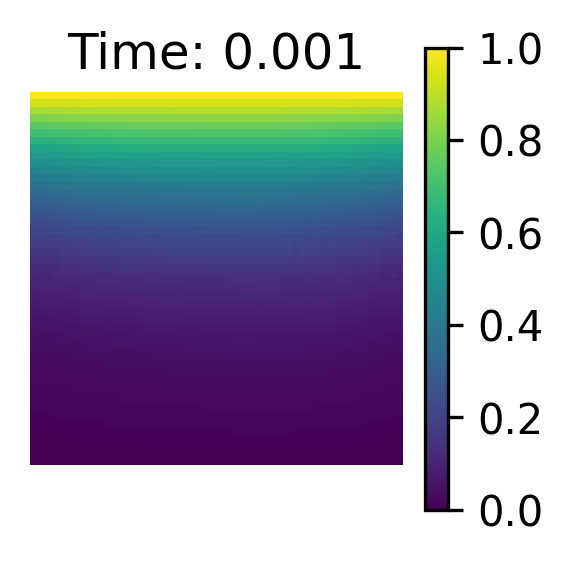

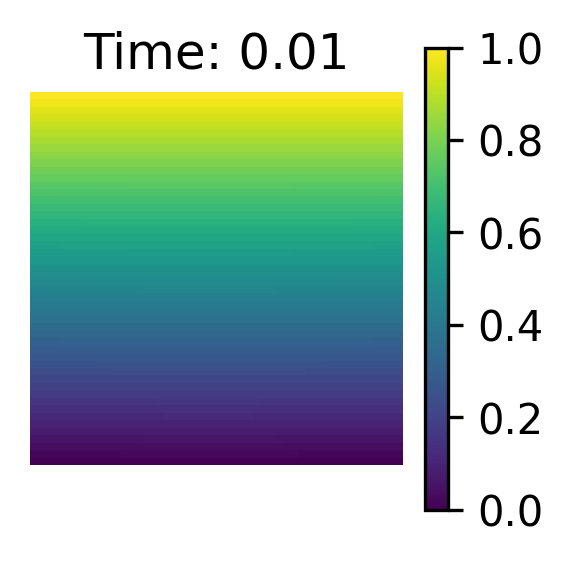

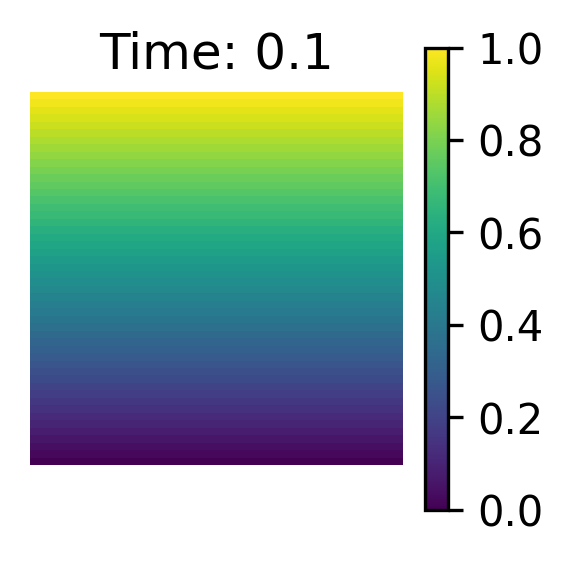

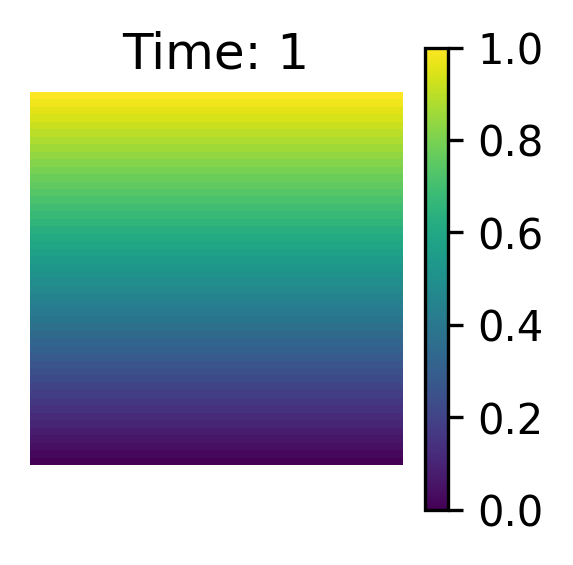

In [ ]:
# Plot graph at certain times to check it is ok
times = [0.001,0.01,0.1,1]

# Get system at desired times
for i in range(len(times)):
    time = times[i]
    sim = c_sim_succor[get_index(time,dt),:,:]
    plt.figure(figsize=(2,2),dpi=300)

    plt.clf()
    plt.imshow(sim, vmin=0, vmax=1)
    plt.axis(False)
    plt.grid(True)
    plt.title('Time: '+str(time))
    plt.colorbar()
    

### I. Show how the convergence measure δ in eq. (14) depends on the number of iterations k for each of the methods

In [ ]:
# Set the epsilon value
EPSILON = 0.0001

# Use the previous simulations
c_sim_jacobi = np.load('c_sim_jacobi.npy')
c_sim_gaussi = np.load('c_sim_gaussi.npy')
c_sim_succor = np.load('c_sim_succor.npy')

In [ ]:
# Convergence
def is_convergence_reached(c,c_k,epsilon):
    return True if np.max(np.abs(c - c_k)) < epsilon else False


In [ ]:
# Compute the max cell difference from pervious timestep
# For all methods
max_jacobi = np.zeros(c_sim_jacobi.shape[0]-1)
max_gaussi = np.zeros(c_sim_gaussi.shape[0]-1)
max_succor = np.zeros(c_sim_succor.shape[0]-1)

for i in range(c_sim_jacobi.shape[0]-1):
    max_jacobi[i] = np.max(np.abs(c_sim_jacobi[i+1,:,:] - c_sim_jacobi[i,:,:]))
    max_gaussi[i] = np.max(np.abs(c_sim_gaussi[i+1,:,:] - c_sim_gaussi[i,:,:]))
    max_succor[i] = np.max(np.abs(c_sim_succor[i+1,:,:] - c_sim_succor[i,:,:]))


In [ ]:
max_jacobi.shape
print(max_jacobi)

[1.25000000e-01 7.81250000e-02 5.46875000e-02 ... 7.74325049e-13
 7.73492381e-13 7.72770736e-13]


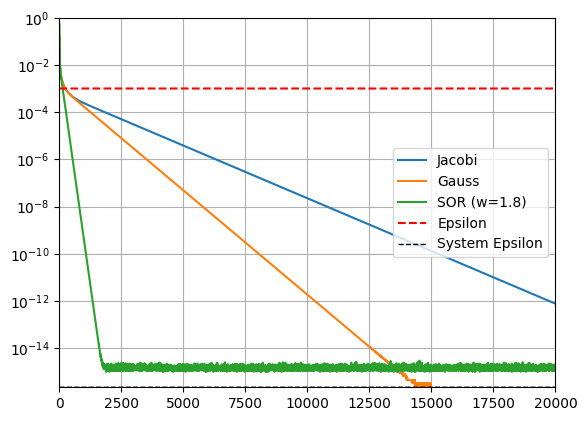

In [ ]:
import sys

print()

SYS_EPSILON = sys.float_info.epsilon


plt.semilogy(np.arange(19999),max_jacobi,label='Jacobi')
plt.semilogy(np.arange(19999),max_gaussi,label='Gauss')
plt.semilogy(np.arange(19999),max_succor,label=f'SOR (w={W})')

plt.semilogy(np.arange(19999),np.ones(19999)*EPSILON,label='Epsilon',c='red',ls='--')
plt.semilogy(np.arange(19999),np.ones(19999)*SYS_EPSILON,label='System Epsilon',c='black',ls='--',lw=1)



plt.legend()
plt.xlim([0,20000])
plt.ylim([SYS_EPSILON,1])

plt.grid()

2.220446049250313e-16

### J. Find the optimal w of SOC. How does the optimal w value depend on N?

### K. Add sinks to the domain

In [ ]:
def square_sink_mask(side,ox,oy,N):
    # Returns a matrix of same size as grid, full of zeros
    # And with 1s in the points that are sinks
    mask = np.zeros((N,N))
    mask[ox:ox+side,oy:oy+side] = 1
    return mask

def rectangle_insulating_mask(w,h,ox,oy,N):
    mask = np.zeros((N,N))
    mask[ox:ox+w,oy:oy+h] = 1
    return mask

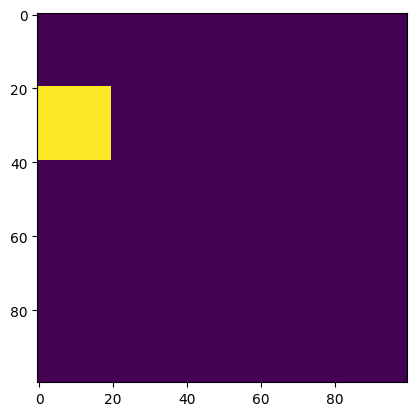

In [ ]:
# Update function so it returns 0 for points in sink!


sink_mask = square_sink_mask(side=20,ox=20,oy=0,N=100)
plt.imshow(sink_mask)

# Create 2D matrix of gridsize with 1s on the points that are within the sinks
# Update the function to return concentration 0 if the point of that matrix has 1

# Simulate normally

## Optional: Incorporate insulating material

In [ ]:
# Concentration 0 but not considered for computations
# Create 2D matrix of points that are insulating material
# Update the function to ignore points of that grid when computing concentrations!